In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel("Aracaju.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
68,Salvador,2019-01-01,162.35,1037,3
86,Salvador,2019-01-01,156.47,1037,3
53,Recife,2019-01-01,37.05,983,6
183,Salvador,2019-01-02,120.23,1037,2
228,Salvador,2019-01-02,6.87,1037,3


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#retorna quantos espaços vazios há em cada coluna
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df.shape

(894, 5)

In [ ]:
#substitui espaços sem valores em Vendas por 0
df["Vendas"].fillna(0, inplace=True) 

In [ ]:
#deleta as linhas com campos sem valores
df.dropna(inplace=True)

In [ ]:
#deleta as linhas com campos de colunas especificos sem valores
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
df["Vendas"].mean()

122.61180089485458

In [ ]:
#remove linhas com todos os membros faltantes
df.dropna(how="all",inplace=True)

In [ ]:
#criação de uma coluna
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df["Receita/Vendas"] = df["Receita"]/df["Vendas"]
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
df["Receita"].max() #retorna o  valor maximo de receita

3544.0

In [ ]:
df.nlargest(3,"Receita") #mostra as 3 linhas com maiores receitas

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
df.nsmallest(3,"Vendas") #mostra as 3 linhas com menores vendas

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
34,Fortaleza,2019-01-01,3.10,1003,5,15.50,5.0
73,Fortaleza,2019-01-01,3.10,1003,5,15.50,5.0


In [ ]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#10 maiores receitas
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [ ]:
#normalmente, colunas de data estão em int e não em datetime, o que não é o nosso caso, mas e se fosse?
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                     int64
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
df["Data"] = df["Data"].astype("int64") #transformando a coluna Data para int
df["Data"] = pd.to_datetime(df["Data"]) #transformando a coluna Data para datetime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df.groupby(df["Data"].dt.year)["Receita"].sum() #retorna a soma das receitas por ano

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
df["Ano_Venda"] = df["Data"].dt.year
df.sample

<bound method NDFrame.sample of        Cidade       Data  Vendas  LojaID  Qtde  Receita  Receita/Vendas  \
0     Aracaju 2018-01-01  142.00    1520     1   142.00             1.0   
1     Aracaju 2018-01-01   14.21    1522     6    85.26             6.0   
2     Aracaju 2018-01-01   71.55    1520     1    71.55             1.0   
3     Aracaju 2018-01-01    3.01    1521     7    21.07             7.0   
4     Aracaju 2018-01-01   24.51    1522     8   196.08             8.0   
..        ...        ...     ...     ...   ...      ...             ...   
235  Salvador 2019-01-03   41.84    1034     1    41.84             1.0   
236  Salvador 2019-01-03  126.29    1035     3   378.87             3.0   
237  Salvador 2019-01-03   38.06    1036     3   114.18             3.0   
238  Salvador 2019-01-03  139.64    1035     1   139.64             1.0   
239  Salvador 2019-01-03  161.41    1037     3   484.23             3.0   

     Ano_Venda  
0         2018  
1         2018  
2         2018  

In [ ]:
#extraindo mes e dia
df["mes_venda"],df["dia_venda"] = (df["Data"].dt.month,df["Data"].dt.day)
df.sample

<bound method NDFrame.sample of        Cidade       Data  Vendas  LojaID  Qtde  Receita  Receita/Vendas  \
0     Aracaju 2018-01-01  142.00    1520     1   142.00             1.0   
1     Aracaju 2018-01-01   14.21    1522     6    85.26             6.0   
2     Aracaju 2018-01-01   71.55    1520     1    71.55             1.0   
3     Aracaju 2018-01-01    3.01    1521     7    21.07             7.0   
4     Aracaju 2018-01-01   24.51    1522     8   196.08             8.0   
..        ...        ...     ...     ...   ...      ...             ...   
235  Salvador 2019-01-03   41.84    1034     1    41.84             1.0   
236  Salvador 2019-01-03  126.29    1035     3   378.87             3.0   
237  Salvador 2019-01-03   38.06    1036     3   114.18             3.0   
238  Salvador 2019-01-03  139.64    1035     1   139.64             1.0   
239  Salvador 2019-01-03  161.41    1037     3   484.23             3.0   

     Ano_Venda  mes_venda  dia_venda  
0         2018          1   

In [ ]:
#data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#calculo de diferença entre dias
df["diferença_dias"] = df["Data"] - df["Data"].min()
df.sample

<bound method NDFrame.sample of        Cidade       Data  Vendas  LojaID  Qtde  Receita  Receita/Vendas  \
0     Aracaju 2018-01-01  142.00    1520     1   142.00             1.0   
1     Aracaju 2018-01-01   14.21    1522     6    85.26             6.0   
2     Aracaju 2018-01-01   71.55    1520     1    71.55             1.0   
3     Aracaju 2018-01-01    3.01    1521     7    21.07             7.0   
4     Aracaju 2018-01-01   24.51    1522     8   196.08             8.0   
..        ...        ...     ...     ...   ...      ...             ...   
235  Salvador 2019-01-03   41.84    1034     1    41.84             1.0   
236  Salvador 2019-01-03  126.29    1035     3   378.87             3.0   
237  Salvador 2019-01-03   38.06    1036     3   114.18             3.0   
238  Salvador 2019-01-03  139.64    1035     1   139.64             1.0   
239  Salvador 2019-01-03  161.41    1037     3   484.23             3.0   

     Ano_Venda  mes_venda  dia_venda diferença_dias  
0         201

In [ ]:
#criando coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias,trimestre_venda
185,Salvador,2019-01-02,6.67,1036,1,6.67,1.0,2019,1,2,366 days,1
59,Recife,2019-01-01,89.39,983,5,446.95,5.0,2019,1,1,365 days,1
178,Salvador,2019-01-02,39.28,1037,3,117.84,3.0,2019,1,2,366 days,1
0,Natal,2018-08-27,606.00,853,2,1212.00,2.0,2018,8,27,238 days,3
72,Recife,2019-01-01,42.32,982,2,84.64,2.0,2019,1,1,365 days,1
119,Salvador,2019-03-02,136.37,1034,2,272.74,2.0,2019,3,2,425 days,1
62,Natal,2018-02-10,793.00,854,4,3172.00,4.0,2018,2,10,40 days,1
22,Natal,2018-06-21,621.00,853,3,1863.00,3.0,2018,6,21,171 days,2
97,Recife,2019-01-01,153.04,983,4,612.16,4.0,2019,1,1,365 days,1
29,Aracaju,2018-01-01,44.04,1520,6,264.24,6.0,2018,1,1,0 days,1


In [ ]:
#filtrando vendas de 2019 e em março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
print(vendas_marco_19)

        Cidade       Data  Vendas  LojaID  Qtde  Receita  Receita/Vendas  \
108  Fortaleza 2019-03-02  152.89     981     4   611.56             4.0   
109  Fortaleza 2019-03-02   18.90     982     6   113.40             6.0   
110  Fortaleza 2019-03-02   51.98     983     6   311.88             6.0   
111  Fortaleza 2019-03-02    8.00     981     3    24.00             3.0   
112  Fortaleza 2019-03-02  133.59     982     1   133.59             1.0   
..         ...        ...     ...     ...   ...      ...             ...   
137   Salvador 2019-03-02   51.66    1036     3   154.98             3.0   
138   Salvador 2019-03-02  212.03    1037     3   636.09             3.0   
139   Salvador 2019-03-02  169.01    1036     1   169.01             1.0   
140   Salvador 2019-03-02   20.79    1036     2    41.58             2.0   
141   Salvador 2019-03-02    9.08    1036     1     9.08             1.0   

     Ano_Venda  mes_venda  dia_venda diferença_dias  trimestre_venda  
108       2019  

In [ ]:
df["LojaID"].value_counts(ascending=False) #mostra o numero de lojas com um ID específico

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

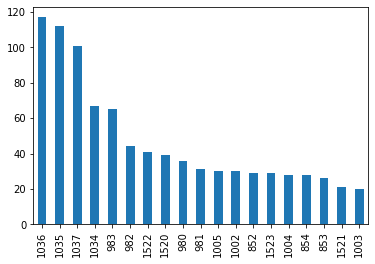

In [ ]:
#grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

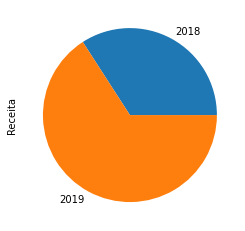

In [ ]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie() # soma das receitas  anuais em gráfico de pizza

Text(0, 0.5, 'Total Vendas')

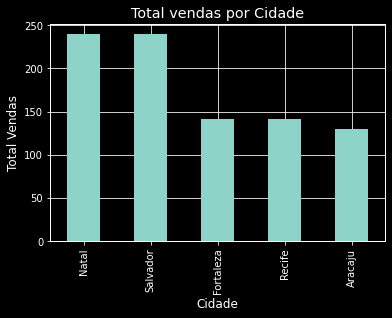

In [ ]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [ ]:
plt.style.use("dark_background") # altera o estilo do gráfico

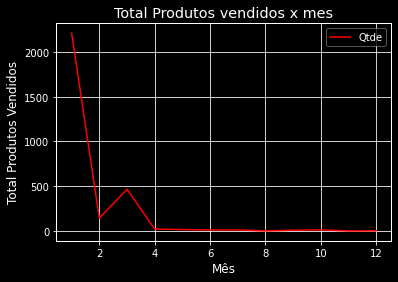

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mes", color="red")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

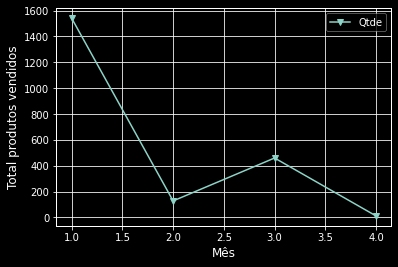

In [ ]:
df_2019 = df[df["Ano_Venda"] == 2019]
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()